In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
import torch.optim as optim

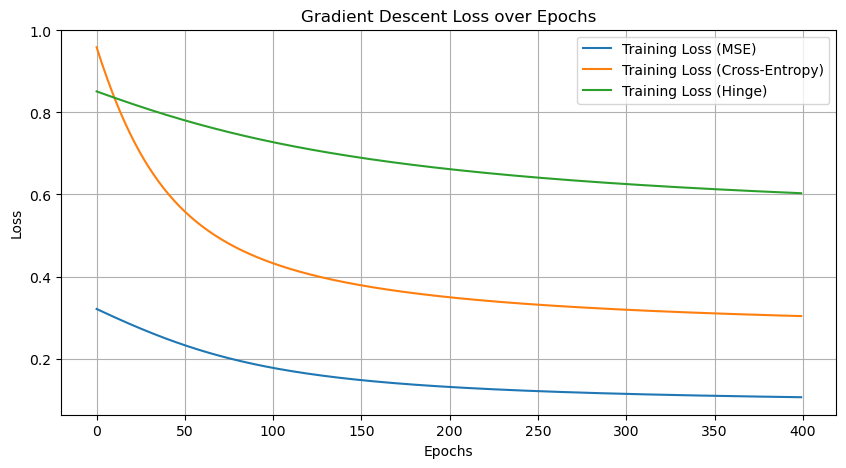

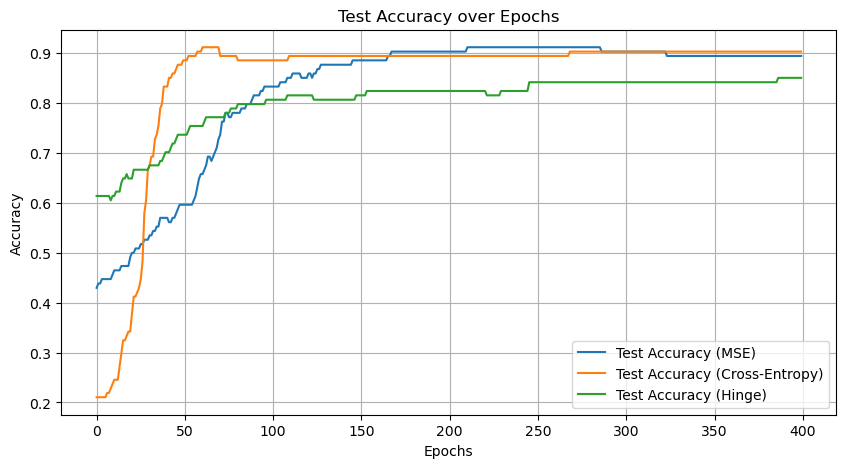

In [8]:
# Set seed
torch.manual_seed(40)
np.random.seed(40)

# number of epoch
num_epochs = 400
learning_rate = 0.04

data = load_breast_cancer()
X = data.data[:, :2]  
y = data.target  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MSE
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)

class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model_mse = LogisticRegressionModel()
criterion_mse = nn.MSELoss()  
optimizer_mse = optim.SGD(model_mse.parameters(), learning_rate)

losses_mse = []  
accuracies_mse = []  

for epoch in range(num_epochs):
    optimizer_mse.zero_grad()

    # Forward pass
    outputs_mse = model_mse(X_train_tensor)
    loss_mse = criterion_mse(outputs_mse, y_train_tensor)

    # Backward pass
    loss_mse.backward()
    optimizer_mse.step()

    # Store the loss
    losses_mse.append(loss_mse.item())

    # Calculate and store accuracy
    y_pred_proba_test_mse = model_mse(torch.FloatTensor(X_test))
    y_pred_test_mse = (y_pred_proba_test_mse > 0.5).float().view(-1)
    accuracy_mse = (y_pred_test_mse.numpy() == y_test).mean()
    accuracies_mse.append(accuracy_mse)

# Cross Entropy Loss
y_train_tensor_ce = torch.FloatTensor(y_train).view(-1, 1)

model_ce = LogisticRegressionModel()
criterion_ce = nn.BCELoss()  
optimizer_ce = optim.SGD(model_ce.parameters(), learning_rate)

losses_ce = []  
accuracies_ce = []  

for epoch in range(num_epochs):
    optimizer_ce.zero_grad()

    # Forward pass
    outputs_ce = model_ce(X_train_tensor)
    loss_ce = criterion_ce(outputs_ce, y_train_tensor_ce)

    # Backward pass
    loss_ce.backward()
    optimizer_ce.step()

    # Store the loss
    losses_ce.append(loss_ce.item())

    # Calculate and store accuracy
    y_pred_proba_test_ce = model_ce(torch.FloatTensor(X_test))
    y_pred_test_ce = (y_pred_proba_test_ce > 0.5).float().view(-1)
    accuracy_ce = (y_pred_test_ce.numpy() == y_test).mean()
    accuracies_ce.append(accuracy_ce)

# Hinge Loss
y_train_tensor_hinge = torch.FloatTensor(y_train * 2 - 1).view(-1, 1) 

class HingeLoss(nn.Module):
    def __init__(self):
        super(HingeLoss, self).__init__()

    def forward(self, outputs, targets):
        return torch.mean(torch.clamp(1 - outputs * targets, min=0))

model_hinge = LogisticRegressionModel()
criterion_hinge = HingeLoss()  
optimizer_hinge = optim.SGD(model_hinge.parameters(), learning_rate)

losses_hinge = []
accuracies_hinge = [] 

for epoch in range(num_epochs):
    optimizer_hinge.zero_grad()

    # Forward pass
    outputs_hinge = model_hinge(X_train_tensor)
    loss_hinge = criterion_hinge(outputs_hinge, y_train_tensor_hinge)

    # Backward pass
    loss_hinge.backward()
    optimizer_hinge.step()

    # Store the loss
    losses_hinge.append(loss_hinge.item())

    # Calculate and store accuracy
    y_pred_proba_test_hinge = model_hinge(torch.FloatTensor(X_test))
    y_pred_test_hinge = (y_pred_proba_test_hinge > 0.5).float().view(-1)
    accuracy_hinge = (y_pred_test_hinge.numpy() == y_test).mean()
    accuracies_hinge.append(accuracy_hinge)

# Plotting the gradient descent loss graphs
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), losses_mse, label='Training Loss (MSE)')
plt.plot(range(num_epochs), losses_ce, label='Training Loss (Cross-Entropy)')
plt.plot(range(num_epochs), losses_hinge, label='Training Loss (Hinge)')
plt.title('Gradient Descent Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.savefig("img1.svg")
plt.show()

# Plotting the accuracy graphs
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), accuracies_mse, label='Test Accuracy (MSE)')
plt.plot(range(num_epochs), accuracies_ce, label='Test Accuracy (Cross-Entropy)')
plt.plot(range(num_epochs), accuracies_hinge, label='Test Accuracy (Hinge)')
plt.title('Test Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.savefig("img2.svg")
plt.show()

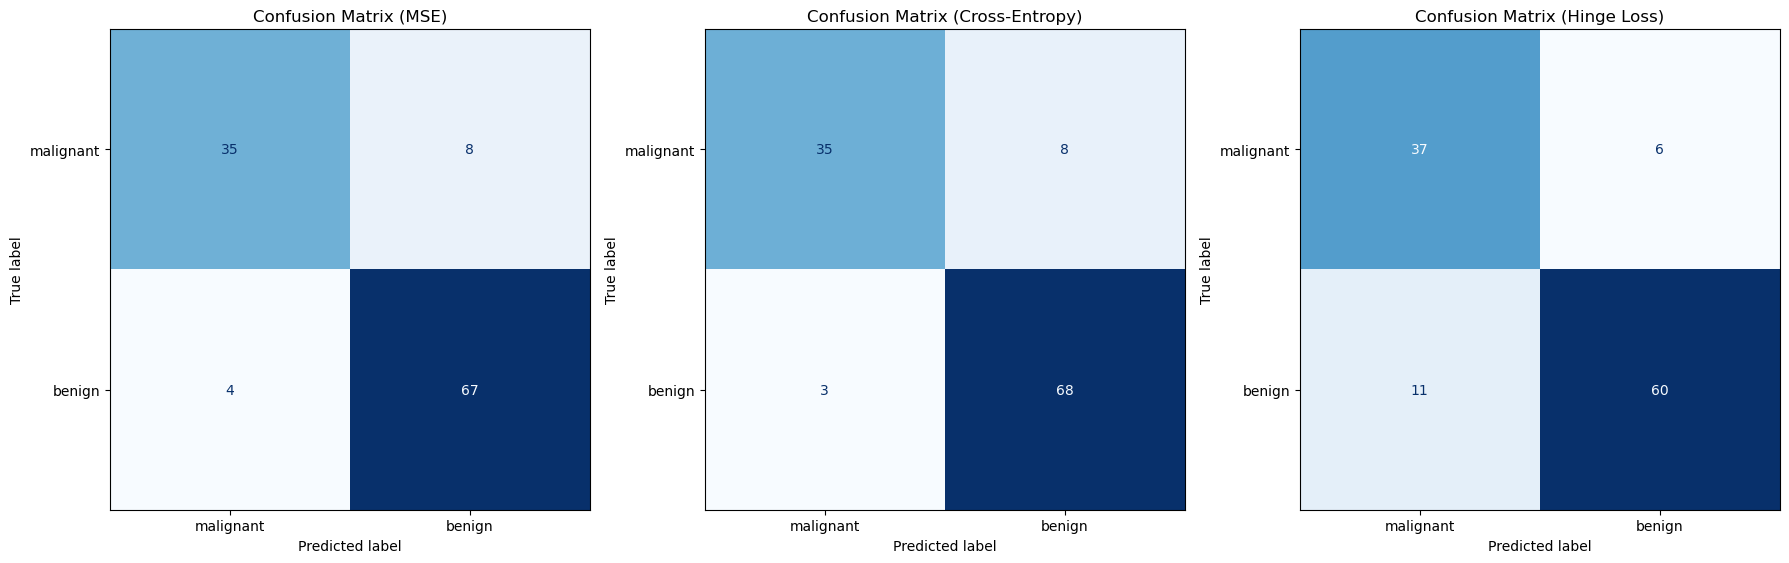

In [9]:

model_mse.eval()
with torch.no_grad():
    y_pred_proba_test_mse = model_mse(torch.FloatTensor(X_test))
    y_pred_test_mse = (y_pred_proba_test_mse > 0.5).float()  
    cm_mse = confusion_matrix(y_test, y_pred_test_mse.numpy())
model_ce.eval()
with torch.no_grad():
    y_pred_proba_test_ce = model_ce(torch.FloatTensor(X_test))
    y_pred_test_ce = (y_pred_proba_test_ce > 0.5).float()  
    cm_ce = confusion_matrix(y_test, y_pred_test_ce.numpy())

model_hinge.eval()
with torch.no_grad():
    y_pred_proba_test_hinge = model_hinge(torch.FloatTensor(X_test))
    y_pred_test_hinge = (y_pred_proba_test_hinge > 0.5).float()  
    cm_hinge = confusion_matrix(y_test, y_pred_test_hinge.numpy())

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

disp_mse = ConfusionMatrixDisplay(confusion_matrix=cm_mse, display_labels=data.target_names)
disp_mse.plot(ax=axes[0], cmap=plt.cm.Blues, colorbar=False)
axes[0].set_title('Confusion Matrix (MSE)')

disp_ce = ConfusionMatrixDisplay(confusion_matrix=cm_ce, display_labels=data.target_names)
disp_ce.plot(ax=axes[1], cmap=plt.cm.Blues, colorbar=False)
axes[1].set_title('Confusion Matrix (Cross-Entropy)')

disp_hinge = ConfusionMatrixDisplay(confusion_matrix=cm_hinge, display_labels=data.target_names)
disp_hinge.plot(ax=axes[2], cmap=plt.cm.Blues, colorbar=False)
axes[2].set_title('Confusion Matrix (Hinge Loss)')

plt.tight_layout()
plt.savefig("img3.svg")
plt.show()

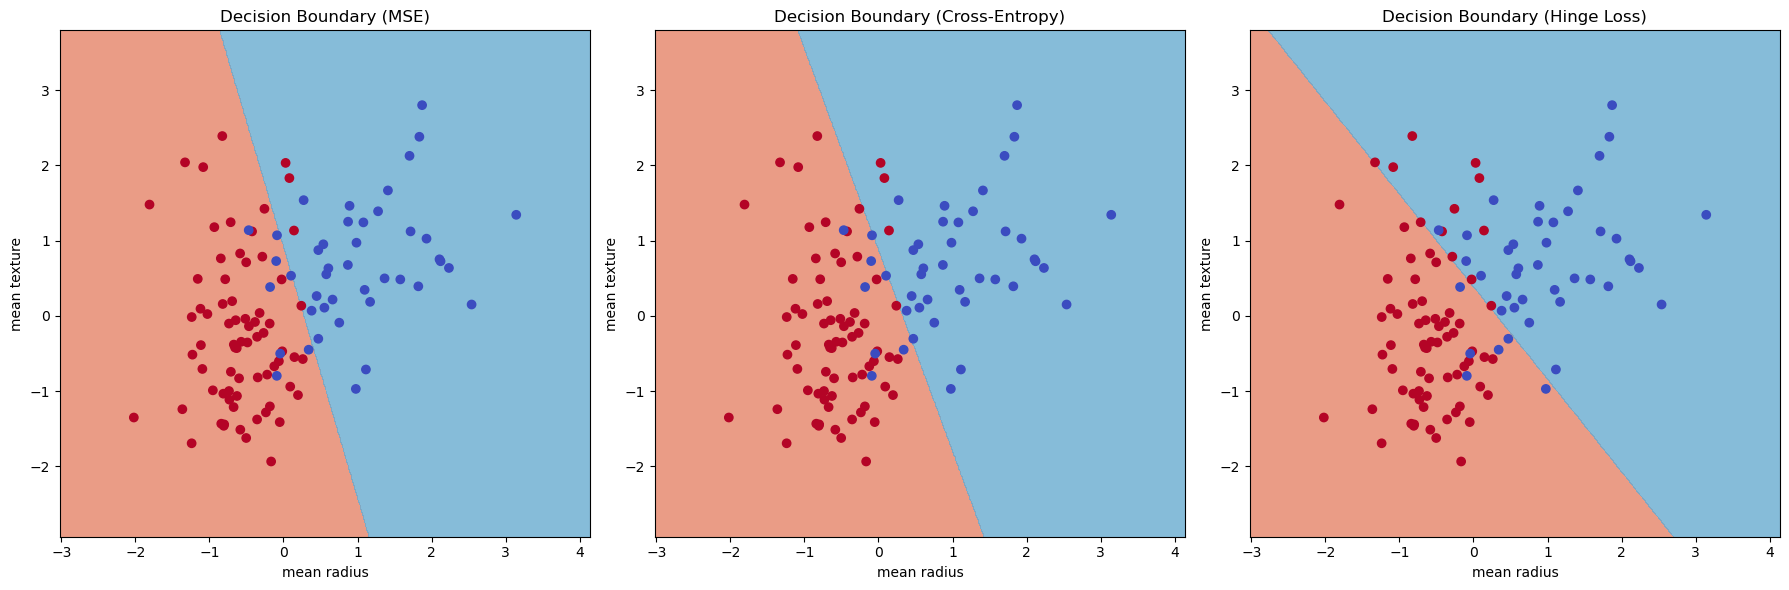

In [10]:
def plot_decision_boundary(ax, model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.FloatTensor(grid)
    with torch.no_grad():
        probs = model(grid_tensor).reshape(xx.shape)
    ax.contourf(xx, yy, probs < 0.5, alpha=0.8, cmap=plt.cm.RdBu)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, marker='o', cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xlabel(data.feature_names[0])
    ax.set_ylabel(data.feature_names[1])
    return scatter


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_decision_boundary(axes[0], model_mse, X_test, y_test, 'Decision Boundary (MSE)')
plot_decision_boundary(axes[1], model_ce, X_test, y_test, 'Decision Boundary (Cross-Entropy)')
plot_decision_boundary(axes[2], model_hinge, X_test, y_test, 'Decision Boundary (Hinge Loss)')
plt.tight_layout()
plt.savefig("img4.svg")
plt.show()
